# Undirected Graphs and Drawing

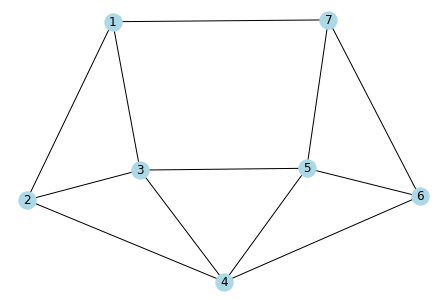

In [61]:
import networkx as nx
from itertools import combinations

G = nx.Graph()
G.add_nodes_from(range(1, 8))

for pair in combinations(G.nodes, 2):
    if abs(pair[0]-pair[1]) % 5 == 1 or abs(pair[0]-pair[1]) % 5 == 2:
        G.add_edge(pair[0], pair[1])

nx.draw(G, with_labels=True, node_color='lightblue')


In [62]:
for tri in combinations(G.nodes, 3):
    if (tri[0], tri[1]) in G.edges and (tri[1], tri[2]) in G.edges and (tri[0], tri[2]) in G.edges:
        print(f'G contains the triangle {tri}.')

G contains the triangle (1, 2, 3).
G contains the triangle (2, 3, 4).
G contains the triangle (3, 4, 5).
G contains the triangle (4, 5, 6).
G contains the triangle (5, 6, 7).


In [63]:
G.adj[1]

AtlasView({2: {}, 3: {}, 7: {}})

In [64]:
clique_list = nx.find_cliques(G)

In [65]:
for clique in clique_list:
    if len(clique) == 3:
        print(f'G contains the triangle {clique}')

G contains the triangle [3, 2, 1]
G contains the triangle [3, 2, 4]
G contains the triangle [3, 5, 4]
G contains the triangle [6, 5, 4]
G contains the triangle [6, 5, 7]


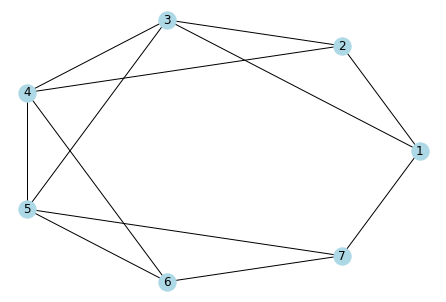

In [66]:
node_pos = nx.circular_layout(G)
nx.draw(G, pos=node_pos, with_labels=True, node_color='lightblue')

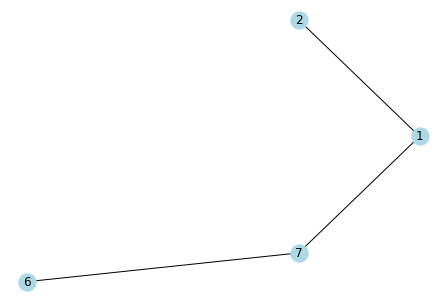

In [73]:
deg_3_nodes = [i for i in G.nodes if G.degree[i] == 3]
H = G.subgraph(deg_3_nodes)
nx.draw(H, pos=node_pos, with_labels=True, node_color='lightblue')

In [80]:
M = nx.max_weight_matching(G)
print(f'A maximum matching in G is {M}')

A maximum matching in G is {(3, 5), (4, 6), (1, 7)}


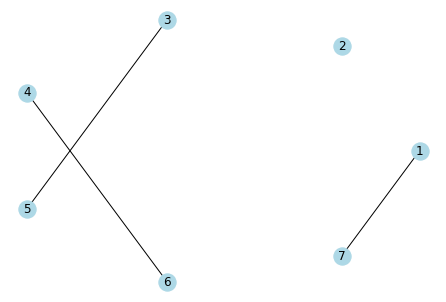

In [81]:
nx.draw(G, with_labels=True, pos=node_pos, node_color='lightblue', edgelist=M)

In [86]:
edges_from_BFS = list(nx.bfs_edges(G, 1))

print(f'BFS found edges {edges_from_BFS}')

BFS found edges [(1, 2), (1, 3), (1, 7), (2, 4), (3, 5), (7, 6)]


In [87]:
nodes_from_BFS = [1] + [v for u, v in nx.bfs_edges(G, 1)]
print(f'BFS found nodes {nodes_from_BFS}')

BFS found nodes [1, 2, 3, 7, 4, 5, 6]


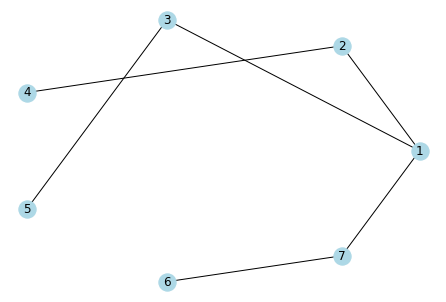

In [89]:
nx.draw(G, with_labels=True, pos=node_pos, node_color='lightblue', edgelist=edges_from_BFS)

# Directed Graphs

In [94]:
import networkx as nx

In [95]:
G = nx.DiGraph()
letters = ['A', 'L', 'P', 'H', 'A', 'B', 'E', 'T']
G.add_nodes_from(letters)

In [96]:
for i in range(7):
    G.add_edge(letters[i], letters[i + 1])

In [98]:
node_pos = nx.circular_layout(G)

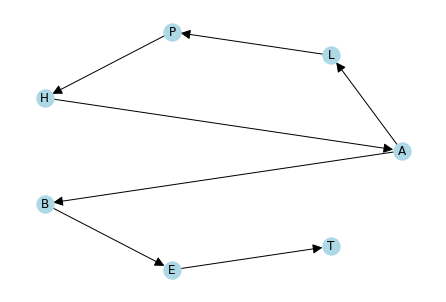

In [101]:
nx.draw(G, with_labels=True, node_color='lightblue', pos=node_pos, arrowsize=20)

In [104]:
# Print the in degree and predecessors of A.
print(f'The in degree of node A is {G.in_degree("A")}.')
print(f'The predecessors of node A are {list(G.predecessors("A"))}.')

# Print the out degree and successors of A.
print(f'The out degree of node A is {G.out_degree("A")}.'.format())
print(f'The successors of node A are {list(G.successors("A"))}.')

The in degree of node A is 1.
The predecessors of node A are ['H'].
The out degree of node A is 2.
The successors of node A are ['L', 'B'].


In [115]:
H = nx.DiGraph()
for u in range(1, 21):
    for v in range(u + 1, 21):
        if (v - u) % 7 == 0 or (v - u) % 5 == 3:
            H.add_edge(u, v)

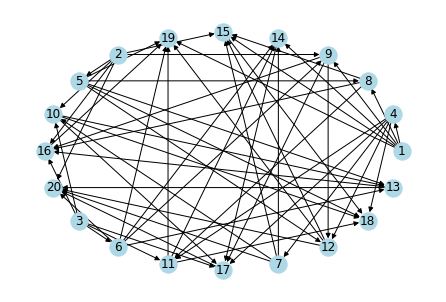

In [116]:
node_pos_H = nx.circular_layout(H)
nx.draw(H, with_labels=True, pos=node_pos_H, node_color='lightblue', arrowsize=10)

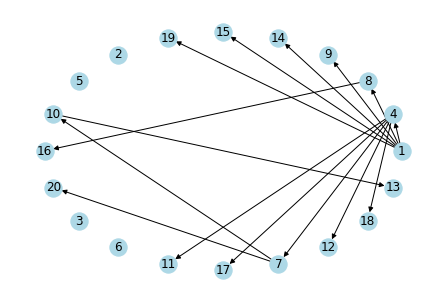

In [117]:
edges_from_BFS = list(nx.bfs_edges(H, 1))
nx.draw(H, with_labels=True, pos=node_pos_H, node_color='lightblue', arrowsize=10, edgelist=edges_from_BFS)

In [119]:
nodes_short_path = nx.shortest_path(H, source=1, target=20)
print(f'A shortest path from 1 to 20 is {nodes_short_path}.')

A shortest path from 1 to 20 is [1, 4, 7, 20].


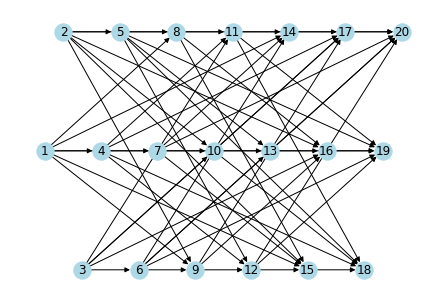

In [120]:
new_node_pos_H = {}
for u in H.nodes:
    new_node_pos_H[u] = (u / 3, u % 3)
nx.draw(H, with_labels=True, pos=new_node_pos_H, node_color='lightblue', arrowsize=10)

In [121]:
long_path = nx.dag_longest_path(H)
print(f'A longest path in H is {long_path}')

A longest path in H is [2, 5, 8, 11, 14, 17, 20]


# Node and Edge Attributes

In [122]:
import networkx as nx
G = nx.Graph()

In [129]:
G.add_node('Berlin', population=3.748)
G.add_nodes_from([('London', {'population': 8.825}), ('Zurich', {'population': 0.415})])

In [130]:
for city in G.nodes:
    print(f'{city} has {G.nodes[city]["population"]} million people')

Berlin has 3.748 million people
London has 8.825 million people
Zurich has 0.415 million people


In [132]:
city_pop = nx.get_node_attributes(G, 'population')
print(f'The populations are {city_pop}')

The populations are {'Berlin': 3.748, 'London': 8.825, 'Zurich': 0.415}


In [134]:
G.add_edge('Berlin', 'London', travel_time = 1.8)
G.add_edges_from([('Berlin', 'Zurich', {'travel_time': 1.5}), ('London', 'Zurich', {'travel_time': 1.7})])

In [135]:
times = nx.get_edge_attributes(G, 'travel_time')
print(f'The travel times are {times}')

The travel times are {('Berlin', 'London'): 1.8, ('Berlin', 'Zurich'): 1.5, ('London', 'Zurich'): 1.7}


In [136]:
G.nodes['Berlin']['population'] = 3.6
for city in G.nodes:
    print(f'{city} has {G.nodes[city]["population"]} million people')
G.edges[('London', 'Zurich')]['travel_time'] = 1.75
times = nx.get_edge_attributes(G, 'travel_time')
print(f'The travel times are {times}')

Berlin has 3.6 million people
London has 8.825 million people
Zurich has 0.415 million people
The travel times are {('Berlin', 'London'): 1.8, ('Berlin', 'Zurich'): 1.5, ('London', 'Zurich'): 1.75}


In [138]:
# Created an empty graph
H = nx.DiGraph()

# Add the arcs
for i in range(1, 12):
    H.add_edge(i, i+1, capacity = 2*i)  
    
    if i <=8:
        H.add_edge(i, i+4, capacity = i*i-10*i+25) 

# Add node positions
node_pos = nx.circular_layout(H)

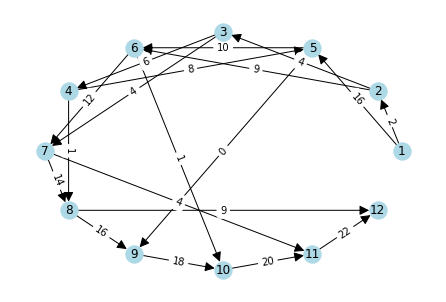

In [142]:
nx.draw(H, with_labels=True, pos=node_pos, node_color='lightblue', arrowsize=20)
edge_draw = nx.draw_networkx_edge_labels(H, pos=node_pos, edge_labels=nx.get_edge_attributes(H, 'capacity'))

In [156]:
# Find a max s-t flow in H
total_flow, edge_flow = nx.maximum_flow(H, 1, 12, capacity='capacity')

print(f'The total value of the flow is {total_flow}.\n')

The total value of the flow is 12.



In [157]:
for e in H.edges:
    H.edges[e]['flow'] = edge_flow[e[0]][e[1]]

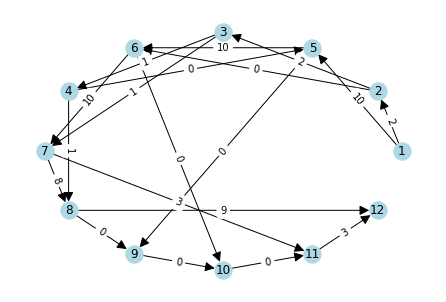

In [158]:
nx.draw(H, with_labels=True, pos=node_pos, node_color='lightblue', arrowsize=20)
edge_draw = nx.draw_networkx_edge_labels(H, pos=node_pos, edge_labels=nx.get_edge_attributes(H, 'flow'))

Students [0, 2, 6, 7] study medicine.
Students [3, 9] study law.
Students [1, 4, 5, 8, 10, 11] study art.


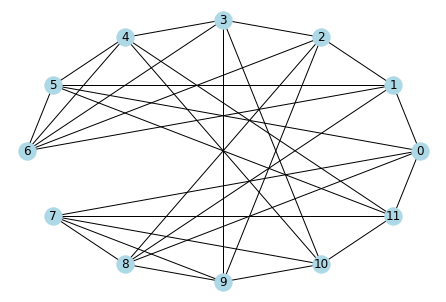

In [159]:
# Load a pre-made graph from networkx
K = nx.icosahedral_graph()

# Create node attribute 'study'
for i in range(0, 12):
    if i % 6 == 0 or i % 5 == 2:
        K.nodes[i]["study"] = "medicine"
    elif i % 6 == 3:
        K.nodes[i]["study"] = "law"
    else:
        K.nodes[i]["study"] = "art"

# Print the student's area of study
study_att = nx.get_node_attributes(K,"study")

for area_of_study in ["medicine","law","art"]:
    print(f'Students {[key for key in K.nodes if study_att[key] == area_of_study]} study {area_of_study}.')

# Draw the graph
node_pos_K = nx.circular_layout(K)

nx.draw(K, with_labels = True, pos = node_pos_K, 
        node_color = 'lightblue')

In [161]:
from itertools import combinations

for t in combinations(K.nodes, 3):
    if set(combinations(t, 2)).issubset(K.edges) and {K.nodes[i]['study'] for i in t} == {'medicine', 'law', 'art'}:
        print(f'The professor can choose students {t}')
    

The professor can choose students (2, 8, 9)
The professor can choose students (3, 4, 6)
The professor can choose students (7, 8, 9)
The professor can choose students (7, 9, 10)
